In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import researchpy as rp
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats as st
from bioinfokit.analys import get_data

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                 
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats           # Scipy again
import warnings
warnings.filterwarnings('ignore')
 
import matplotlib.pyplot as plt

In [6]:
# pip install bioinfokit

     -------------------------------------- 87.0/87.0 kB 446.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58673 sha256=1a20faaa3a447f33e485193571e29f3ccf6c856d3afd5e46d6af772bfe02af72
  Stored in directory: c:\users\varada\appdata\local\pip\cache\wheels\93\5b\a8\2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7103 sha256=3a4f6913a734401223908737e9c40b977f6edd7eaf37ec2ea7de869bded6405b
  Stored in directory: c:\users\varada\appdata\local\pip\cache\wheels\06\b2\e0\b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for matplotlib-venn: fi

In [4]:
# pip install researchpy



[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Main Code

In [9]:
df = pd.read_csv(r"C:\Users\Varada\Desktop\PCOS_featureselection.csv")
#missin values
df = df.fillna(df.median())
#feature engineering
#converting categorical variables into numerical ones
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

df=df.drop('Sl. No', axis=1)
df=df.drop('Patient File No.', axis=1)


data  = df.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector

In [2]:
# df=pd.read_excel('ILICOVID-19DiagnosisNew3.xlsx')
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows',None)

In [10]:
df = df.sample(frac = 1)  #Shuffle the rows

In [11]:
df.shape

(541, 42)

In [13]:
df.head()

Age (yrs)  Weight (Kg)  Height(Cm)    BMI  Blood Group  \
118          33         83.0        162.0  31.6           13   
493          30         50.0        154.0  21.1           15   
42           28         33.0        157.0  13.4           13   
131          25         53.4        159.0  21.1           11   
229          28         74.3        154.0  31.3           13   

     Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
118                78                22      11.0           2   
493                72                20      10.8           2   
42                 78                18      11.5           4   
131                72                18      10.5           2   
229                72                18      10.7           2   

     Cycle length(days)  ...  Fast food (Y/N)  Reg.Exercise(Y/N)  \
118                   5  ...              1.0                  0   
493                   4  ...              0.0                  1   
42                    9  ...              0.0                  0   
131                   5  ...              1.0                  0   
229                   5  ...              1.0                  0   

     BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
118                  110                    80                 7   
493                  120                    80                 9   
42                   100                    70                 0   
131                  110                    70                 3   
229                  110                    80                 6   

     Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
118                 9                  18.0                  20.0   
493                19                  19.0                  18.0   
42                  1                   0.0                  12.0   
131                 7                  15.0                  14.0   
229                 5                  14.0                  13.0   

     Endometrium (mm)  PCOS (Y/N)  
118               8.0           0  
493               6.0           1  
42                6.5           0  
131              11.5           0  
229               8.5           0  

[5 rows x 42 columns]

In [14]:
df.isnull().sum()

 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 118 to 245
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    Age (yrs)              541 non-null    int64  
 1   Weight (Kg)             541 non-null    float64
 2   Height(Cm)              541 non-null    float64
 3   BMI                     541 non-null    float64
 4   Blood Group             541 non-null    int64  
 5   Pulse rate(bpm)         541 non-null    int64  
 6   RR (breaths/min)        541 non-null    int64  
 7   Hb(g/dl)                541 non-null    float64
 8   Cycle(R/I)              541 non-null    int64  
 9   Cycle length(days)      541 non-null    int64  
 10  Marraige Status (Yrs)   541 non-null    float64
 11  Pregnant(Y/N)           541 non-null    int64  
 12  No. of abortions        541 non-null    int64  
 13    I   beta-HCG(mIU/mL)  541 non-null    float64
 14  II    beta-HCG(mIU/mL)  541 non-null    

In [16]:
df.describe()

Age (yrs)  Weight (Kg)  Height(Cm)          BMI  Blood Group  \
count  541.000000   541.000000   541.000000  541.000000   541.000000   
mean    31.430684    59.637153   156.484835   24.307579    13.802218   
std      5.411006    11.028287     6.033545    4.055129     1.840812   
min     20.000000    31.000000   137.000000   12.400000    11.000000   
25%     28.000000    52.000000   152.000000   21.600000    13.000000   
50%     31.000000    59.000000   156.000000   24.200000    14.000000   
75%     35.000000    65.000000   160.000000   26.600000    15.000000   
max     48.000000   108.000000   180.000000   38.900000    18.000000   

       Pulse rate(bpm)   RR (breaths/min)    Hb(g/dl)  Cycle(R/I)  \
count        541.000000        541.000000  541.000000  541.000000   
mean          73.247689         19.243993   11.160037    2.560074   
std            4.430285          1.688629    0.866904    0.901950   
min           13.000000         16.000000    8.500000    2.000000   
25%           72.000000         18.000000   10.500000    2.000000   
50%           72.000000         18.000000   11.000000    2.000000   
75%           74.000000         20.000000   11.700000    4.000000   
max           82.000000         28.000000   14.800000    5.000000   

       Cycle length(days)  ...  Fast food (Y/N)  Reg.Exercise(Y/N)  \
count           541.00000  ...       541.000000         541.000000   
mean              4.94085  ...         0.515712           0.247689   
std               1.49202  ...         0.500216           0.432070   
min               0.00000  ...         0.000000           0.000000   
25%               4.00000  ...         0.000000           0.000000   
50%               5.00000  ...         1.000000           0.000000   
75%               5.00000  ...         1.000000           0.000000   
max              12.00000  ...         1.000000           1.000000   

       BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
count           541.000000            541.000000        541.000000   
mean            114.661738             76.927911          6.129390   
std               7.384556              5.574112          4.229294   
min              12.000000              8.000000          0.000000   
25%             110.000000             70.000000          3.000000   
50%             110.000000             80.000000          5.000000   
75%             120.000000             80.000000          9.000000   
max             140.000000            100.000000         22.000000   

       Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
count        541.000000            541.000000            541.000000   
mean           6.641405             15.018115             15.451701   
std            4.436889              3.566839              3.318848   
min            0.000000              0.000000              0.000000   
25%            3.000000             13.000000             13.000000   
50%            6.000000             15.000000             16.000000   
75%           10.000000             18.000000             18.000000   
max           20.000000             24.000000             24.000000   

       Endometrium (mm)  PCOS (Y/N)  
count        541.000000  541.000000  
mean           8.475915    0.327172  
std            2.165381    0.469615  
min            0.000000    0.000000  
25%            7.000000    0.000000  
50%            8.500000    0.000000  
75%            9.800000    1.000000  
max           18.000000    1.000000  

[8 rows x 42 columns]

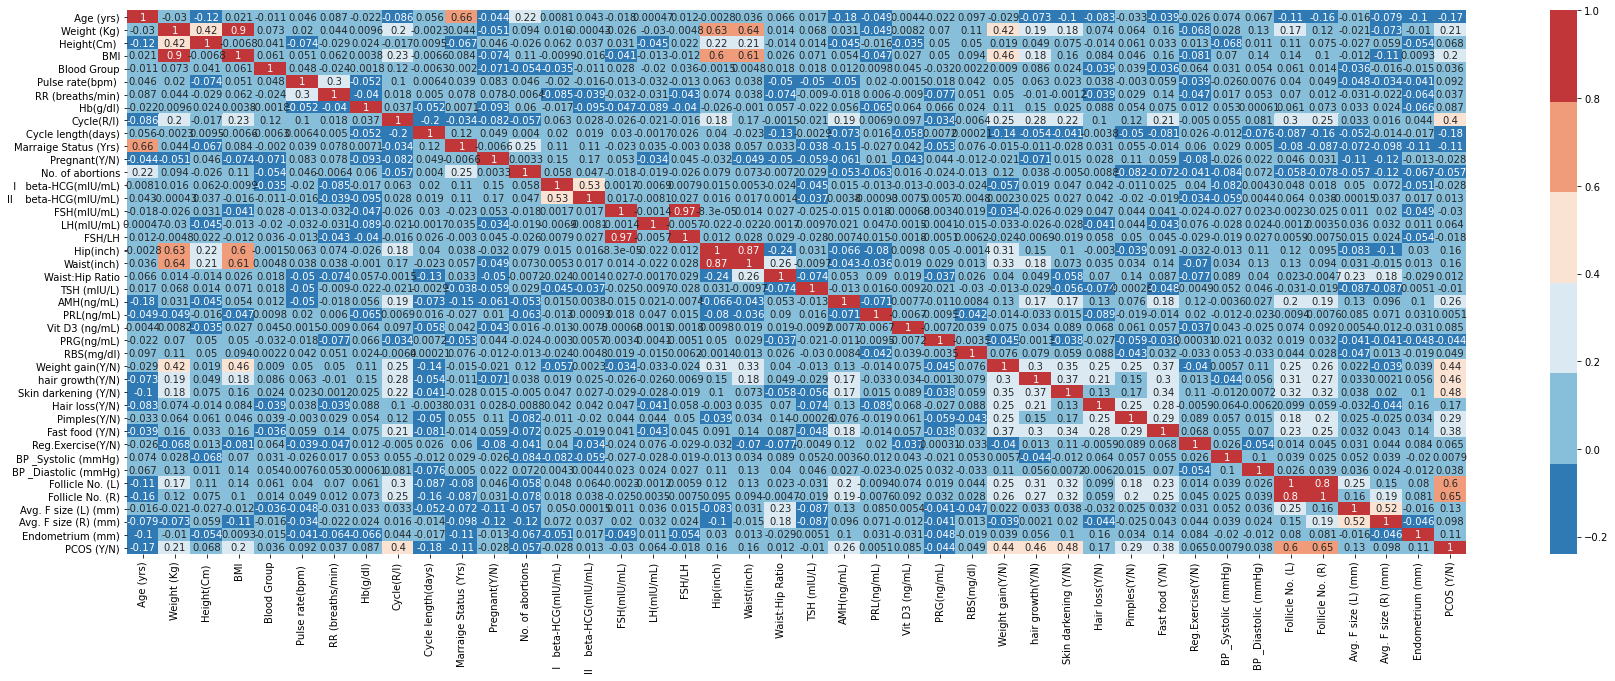

In [17]:
#Pearsons Co-relation
df = df.astype('float64')
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
            annot=True)
#plt.savefig("Pearson.png", dpi=600,bbox_inches = 'tight')
plt.show()

In [19]:
#Correlation with output variable
cor_target = abs(corr["PCOS (Y/N)"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0001 ]
relevant_features.sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199697
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.113056
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
No. of abortions          0.057158
RBS(mg/dl)          

In [20]:
# from sklearn.preprocessing import StandardScaler

In [21]:
# # copy the data
# df_max_scaled = df.copy()
  
# # apply normalization techniques
# for column in df_max_scaled.columns:
#     df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# # view normalized data
# display(df_max_scaled)

In [22]:
# #Pearsons Co-relation
# df_max_scaled = df_max_scaled.astype('float64')
# import seaborn as sns
# corr=df_max_scaled.corr()
# plt.figure(figsize=(30,10))
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
#             annot=True)
# #plt.savefig("Pearson.png", dpi=600,bbox_inches = 'tight')
# plt.show()

In [25]:
# #Correlation with output variable
# cor_target = abs(corr["PCOS (Y/N)"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.0001 ]
# relevant_features.sort_values(ascending=False)

In [15]:
# df=df_max_scaled

In [16]:
# df
# df.to_excel('standardized.xlsx', index=False)

In [17]:
# df = pd.get_dummies(df, columns = ['Gender'])
# df

Text(0.5, 1.0, 'Histogram of Follicle No. (L)')

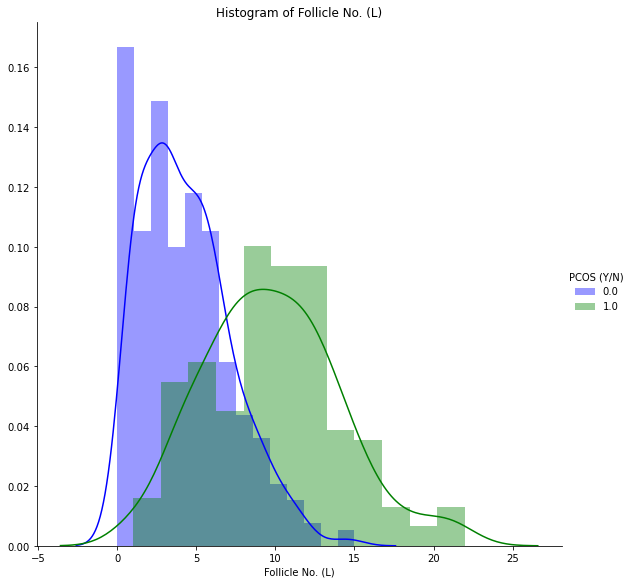

In [26]:
#PDF for age
d = {'color': ['b', 'g']}
sns.FacetGrid(df,hue='PCOS (Y/N)',hue_kws=d, height=8).map(sns.distplot,'Follicle No. (L)').add_legend()
plt.title('Histogram of Follicle No. (L)')


In [27]:
# #PDF for age
# d = {'color': ['b', 'g']}
# sns.FacetGrid(df,hue='Classlabel', hue_kws=d, height=8).map(sns.distplot,'Neutrophil').add_legend()
# plt.title('Histogram of neutrophil')
# plt.savefig("Agehistogram.png", dpi=600,bbox_inches = 'tight')

In [28]:
# #PDF for age
# d = {'color': ['b', 'g']}
# sns.FacetGrid(df,hue='Classlabel', hue_kws=d, height=8).map(sns.distplot,'lymphocyte').add_legend()
# plt.title('Histogram of lymphocyte')

In [29]:
# #PDF for age
# d = {'color': ['b', 'g']}
# sns.FacetGrid(df,hue='Classlabel', hue_kws=d, height=8).map(sns.distplot,'Eosinophil').add_legend()
# plt.title('Histogram of Eosinophil')

In [30]:
# #PDF for age
# d = {'color': ['b', 'g']}
# sns.FacetGrid(df,hue='Classlabel', hue_kws=d, height=8).map(sns.distplot,'Monocyte').add_legend()
# plt.title('Histogram of Monocyte')

In [32]:
# #PDF for age
# d = {'color': ['b', 'g']}
# sns.FacetGrid(df,hue='Classlabel', hue_kws=d, height=8).map(sns.distplot,'Urea').add_legend()
# plt.title('Histogram of Urea')

No handles with labels found to put in legend.


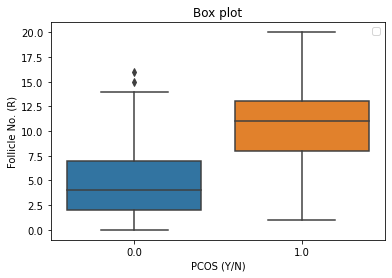

In [34]:
#Boxplot
sns.boxplot(x=df["PCOS (Y/N)"],y=df["Follicle No. (R)"])
plt.legend()
plt.title('Box plot')
plt.show()

No handles with labels found to put in legend.


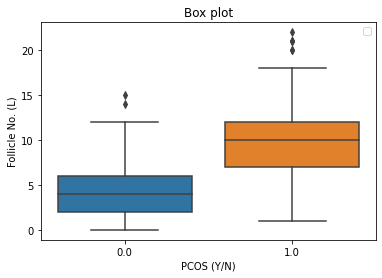

In [35]:
#Boxplot
sns.boxplot(x=df["PCOS (Y/N)"],y=df["Follicle No. (L)"])
plt.legend()
plt.title('Box plot')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


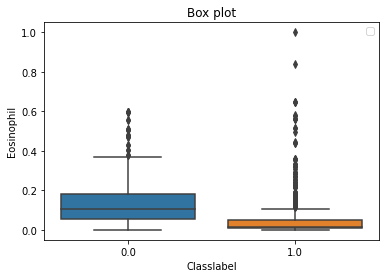

In [25]:
#Boxplot
sns.boxplot(x=df["Classlabel"],y=df["Eosinophil"])
plt.legend()
plt.title('Box plot')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


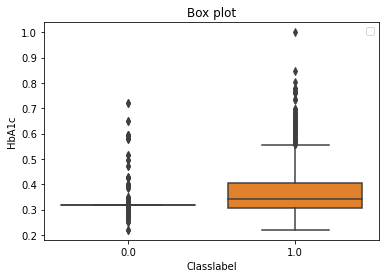

In [26]:
#Boxplot
sns.boxplot(x=df["Classlabel"],y=df["HbA1c"])
plt.legend()
plt.title('Box plot')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


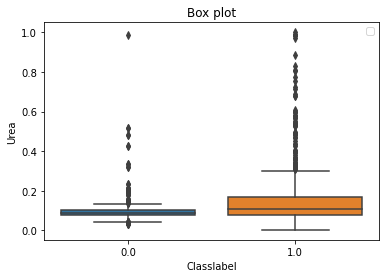

In [27]:
#Boxplot
sns.boxplot(x=df["Classlabel"],y=df["Urea"])
plt.legend()
plt.title('Box plot')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


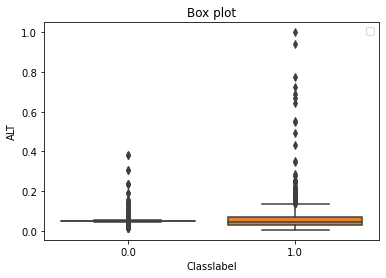

In [28]:
#Boxplot
sns.boxplot(x=df["Classlabel"],y=df["ALT"])
plt.legend()
plt.title('Box plot')
plt.show()

In [36]:
df.head()

Age (yrs)  Weight (Kg)  Height(Cm)    BMI  Blood Group  \
118        33.0         83.0        162.0  31.6         13.0   
493        30.0         50.0        154.0  21.1         15.0   
42         28.0         33.0        157.0  13.4         13.0   
131        25.0         53.4        159.0  21.1         11.0   
229        28.0         74.3        154.0  31.3         13.0   

     Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
118              78.0              22.0      11.0         2.0   
493              72.0              20.0      10.8         2.0   
42               78.0              18.0      11.5         4.0   
131              72.0              18.0      10.5         2.0   
229              72.0              18.0      10.7         2.0   

     Cycle length(days)  ...  Fast food (Y/N)  Reg.Exercise(Y/N)  \
118                 5.0  ...              1.0                0.0   
493                 4.0  ...              0.0                1.0   
42                  9.0  ...              0.0                0.0   
131                 5.0  ...              1.0                0.0   
229                 5.0  ...              1.0                0.0   

     BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
118                110.0                  80.0               7.0   
493                120.0                  80.0               9.0   
42                 100.0                  70.0               0.0   
131                110.0                  70.0               3.0   
229                110.0                  80.0               6.0   

     Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
118               9.0                  18.0                  20.0   
493              19.0                  19.0                  18.0   
42                1.0                   0.0                  12.0   
131               7.0                  15.0                  14.0   
229               5.0                  14.0                  13.0   

     Endometrium (mm)  PCOS (Y/N)  
118               8.0         0.0  
493               6.0         1.0  
42                6.5         0.0  
131              11.5         0.0  
229               8.5         0.0  

[5 rows x 42 columns]

In [30]:
# numerical=['Age','Hb(Hemoglobin)','PCV%(Haemtocrit)','TWBC','Neutrophil','lymphocyte','NLR','Monocyte','Eosinophil','Platelet','Basophil','Urea','Creatinine','Sodium','Potashium','T. Bilirubin','D.Bilirubin','AST','ALT','ALP','Protein','Albumin','HbA1c'] # --> Choosing the proper numerical features 

# df_copy = df.copy()
# df_copy[numerical]=df_copy[numerical].astype('float64')

In [31]:
# df_copy[numerical].plot(kind='box',subplots=True, layout=(10,10), fontsize=8, figsize=(14,14))
# plt.suptitle('(a)', fontsize=10,fontweight='bold')
# plt.savefig("Outlier.png", dpi=600)

In [32]:
# IQR=df_copy[numerical].describe().T['75%']-df_copy[numerical].describe().T['25%']

# min,max=[df_copy[numerical].describe().T['25%']-(IQR*1.5),df_copy[numerical].describe().T['75%']+(IQR*1.5)]

# for i in numerical:
#     print('range of',i,'b/w',min[i],'and',max[i])

# for i in numerical:
#     df_copy[i][df_copy[i]>max[i]]=max[i]
#     df_copy[i][df_copy[i]<min[i]]=min[i]

In [33]:
# df=df_copy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


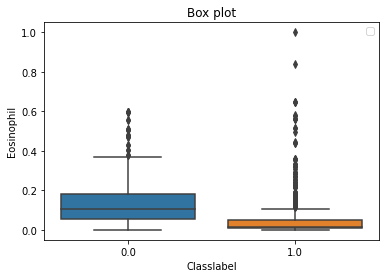

In [34]:
#Boxplot
sns.boxplot(x=df["Classlabel"],y=df["Eosinophil"])
plt.legend()
plt.title('Box plot')
plt.show()

Text(0.5, 1.0, 'Scatter')

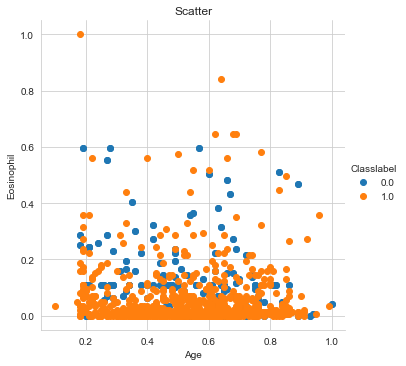

In [35]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Classlabel',height=5).map(plt.scatter,'Age','Eosinophil').add_legend()
plt.title('Scatter')

In [36]:
df=df.drop(['Eosinophil','HbA1c','Gender','Platelet'], axis='columns')
df

Age  Hb(Hemoglobin)  PCV%(Haemtocrit)      TWBC  Neutrophil  \
957   0.47        0.240642          0.231304  0.044068    0.653061   
10    0.44        0.454545          0.471304  0.093220    0.490816   
1025  0.54        0.802139          0.761739  0.116949    0.867347   
638   0.80        0.791444          0.753043  0.140678    0.714286   
1073  0.56        0.663102          0.634783  0.134746    0.685714   
561   0.22        0.524064          0.546087  0.071186    0.734694   
140   0.35        0.786096          0.765217  0.077966    0.734694   
622   0.63        0.791444          0.761739  0.127119    0.765306   
1139  0.64        0.636364          0.650435  0.140678    0.453061   
39    0.56        0.663102          0.634783  0.134746    0.685714   
397   0.34        0.721925          0.695652  0.093220    0.774490   
335   0.23        0.812834          0.784348  0.133898    0.724490   
67    0.20        0.663102          0.634783  0.154237    0.685714   
311   0.31        0.855615          0.834783  0.057627    0.459184   
731   0.21        0.668449          0.659130  0.127119    0.720408   
991   0.66        0.588235          0.556522  0.183051    0.993878   
1064  0.58        0.609626          0.573913  0.113559    0.510204   
939   0.42        0.855615          0.813913  0.223729    0.891837   
52    0.23        0.689840          0.634783  0.052542    0.664286   
938   0.67        0.796791          0.763478  0.145763    0.928571   
1145  0.75        0.716578          0.666087  0.125424    0.739796   
446   0.69        0.721925          0.678261  0.179661    0.892857   
779   0.64        0.871658          0.805217  0.127119    0.800000   
700   0.71        0.577540          0.596522  0.088136    0.802041   
316   0.84        0.636364          0.610435  0.096610    0.826531   
421   0.43        0.754011          0.753043  0.062712    0.418367   
207   0.68        0.668449          0.626087  0.096610    0.744898   
1052  0.84        0.513369          0.495652  0.115254    0.801020   
451   0.81        0.566845          0.521739  0.071186    0.673469   
661   0.52        0.673797          0.646957  0.191525    0.795918   
74    0.75        0.641711          0.620870  0.120339    0.762245   
1134  0.57        0.636364          0.594783  0.096610    0.523469   
465   0.85        0.641711          0.608696  0.164407    0.718367   
83    0.72        0.657754          0.634783  0.127119    0.897959   
509   0.38        0.679144          0.657391  0.108475    0.724490   
444   0.85        0.641711          0.626087  0.083051    0.765306   
617   0.70        0.502674          0.500870  0.110169    0.682653   
272   0.46        0.802139          0.782609  0.076271    0.683673   
854   0.66        0.304813          0.304348  0.071186    0.984694   
1022  0.53        0.844920          0.829565  0.054237    0.673469   
184   0.53        0.802139          0.782609  0.089831    0.581633   
342   0.25        0.743316          0.732174  0.069492    0.612245   
43    0.47        0.695187          0.657391  0.128814    0.663265   
994   0.58        0.647059          0.626087  0.111864    0.826531   
748   0.57        0.641711          0.652174  0.186441    0.877551   
1024  0.46        0.716578          0.693913  0.125424    0.816327   
606   0.52        0.700535          0.678261  0.142373    0.755102   
538   0.43        0.475936          0.469565  0.120339    0.826531   
104   0.83        0.572193          0.546087  0.074576    0.540816   
95    0.85        0.566845          0.561739  0.269492    0.790816   
671   0.53        0.620321          0.573913  0.096610    0.751020   
872   0.57        0.556150          0.582609  0.413559    0.928571   
673   0.49        0.770053          0.766957  0.083051    0.792857   
533   0.38        0.652406          0.626087  0.101695    0.836735   
345   0.19        0.893048          0.779130  0.096610    0.367347   
201   0.54        0.609626          0.582609  0.064407    0.489796   
870   0.80       

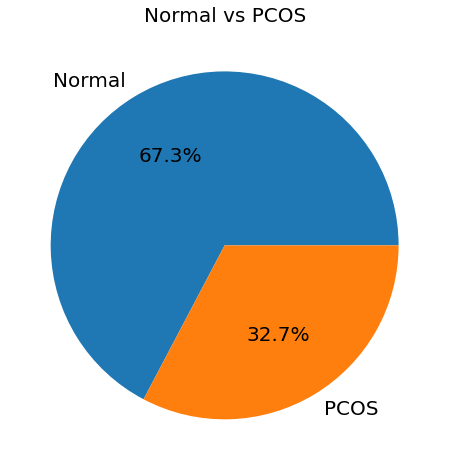

In [39]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']


plt.figure(figsize = (12,8))
plt.pie(y.value_counts(), labels = ['Normal', 'PCOS'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Normal vs PCOS', fontsize=20)
plt.show()

#oversample = BorderlineSMOTE()
#x, y = oversample.fit_resample(x, y)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)


oversample = BorderlineSMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)






In [38]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
#Determine mutual informatiom
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)


Sodium              0.282700
Albumin             0.273563
Potashium           0.258255
ALP                 0.257570
Neutrophil          0.257086
Urea                0.252450
Protein             0.251304
AST                 0.249815
ALT                 0.246839
Basophil            0.245154
Hb(Hemoglobin)      0.216708
TWBC                0.195542
NLR                 0.193223
lymphocyte          0.186788
Age                 0.181883
T. Bilirubin        0.153524
PCV%(Haemtocrit)    0.144095
Monocyte            0.140906
D.Bilirubin         0.114066
Creatinine          0.088887
dtype: float64

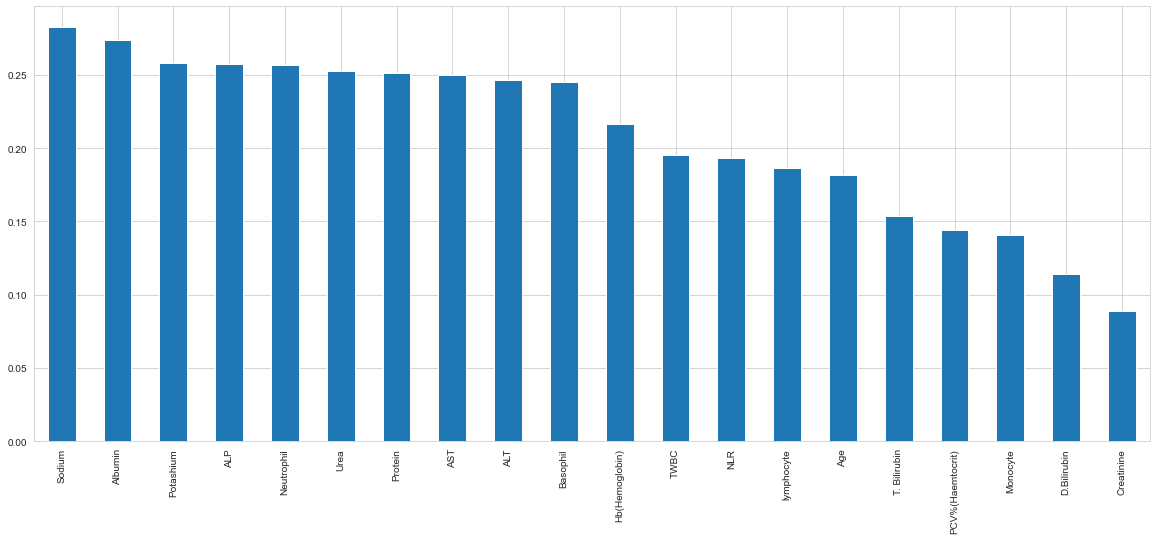

In [39]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.savefig("MutualInformation.png", dpi=600,bbox_inches = 'tight')

In [40]:
#Independent sample t test


In [41]:
y.head(200)



957     1.0
10      0.0
1025    1.0
638     1.0
1073    0.0
561     1.0
140     1.0
622     1.0
1139    0.0
39      0.0
397     1.0
335     1.0
67      0.0
311     1.0
731     1.0
991     1.0
1064    0.0
939     1.0
52      0.0
938     1.0
1145    0.0
446     1.0
779     1.0
700     1.0
316     1.0
421     1.0
207     1.0
1052    0.0
451     1.0
661     1.0
74      0.0
1134    0.0
465     1.0
83      0.0
509     1.0
444     1.0
617     1.0
272     1.0
854     1.0
1022    1.0
184     1.0
342     1.0
43      0.0
994     1.0
748     1.0
1024    1.0
606     1.0
538     1.0
104     0.0
95      0.0
671     1.0
872     1.0
673     1.0
533     1.0
345     1.0
201     1.0
870     1.0
676     1.0
340     1.0
1101    0.0
894     1.0
333     1.0
1066    0.0
1047    0.0
226     1.0
964     1.0
1019    1.0
860     1.0
581     1.0
917     1.0
8       0.0
458     1.0
117     0.0
817     1.0
934     1.0
1104    0.0
920     1.0
1118    0.0
795     1.0
750     1.0
744     1.0
1004    1.0
208     1.0
1135

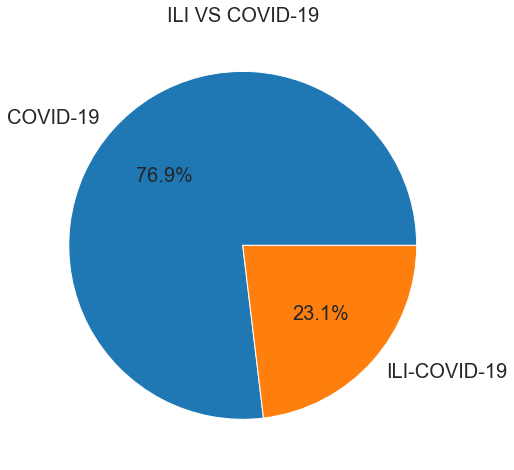

In [42]:

plt.figure(figsize = (12,8))
plt.pie(y.value_counts(), labels = ['COVID-19', 'ILI-COVID-19'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('ILI VS COVID-19', fontsize=20)
plt.savefig("ILI vs COVID-19 results Pie Piechart", dpi=800,bbox_inches = 'tight')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rfclassifier = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

rfclassifier.fit(x_train, y_train)
rfclassifier.best_params_


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred = rfclassifier.predict(x_test)
y_proba = rfclassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 65  11]
 [  2 273]]
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91        76
         1.0       0.96      0.99      0.98       275

    accuracy                           0.96       351
   macro avg       0.97      0.92      0.94       351
weighted avg       0.96      0.96      0.96       351





accuracy 0.96
precision 0.96
recall 0.99
AUC: 0.98
Precision-Recall: 1.0


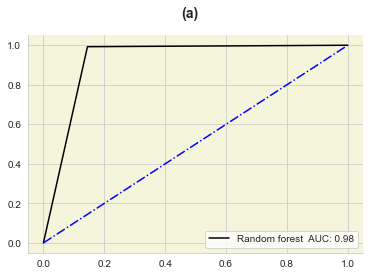

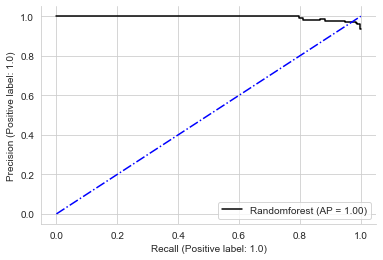

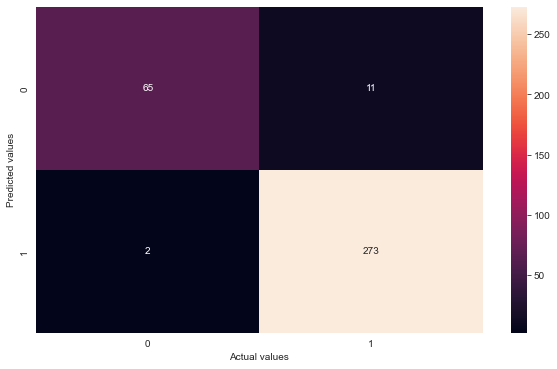

In [45]:
# RandomForest summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Random forest  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rfclassifier, x_test, y_test,color='xkcd:black', name = 'Randomforest')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Random forest", dpi=800,bbox_inches = 'tight')

In [46]:
import shap
shap.initjs()
explainer = shap.Explainer(rfclassifier.predict, x_train)
shap_values = explainer(x_train)

Permutation explainer: 1249it [20:28,  1.01it/s]                                                                       


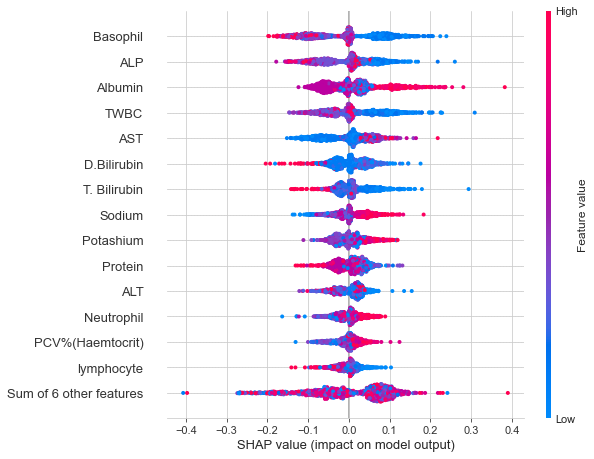

In [47]:
fig=plt.figure()
fig=shap.plots.beeswarm(shap_values, max_display=15)

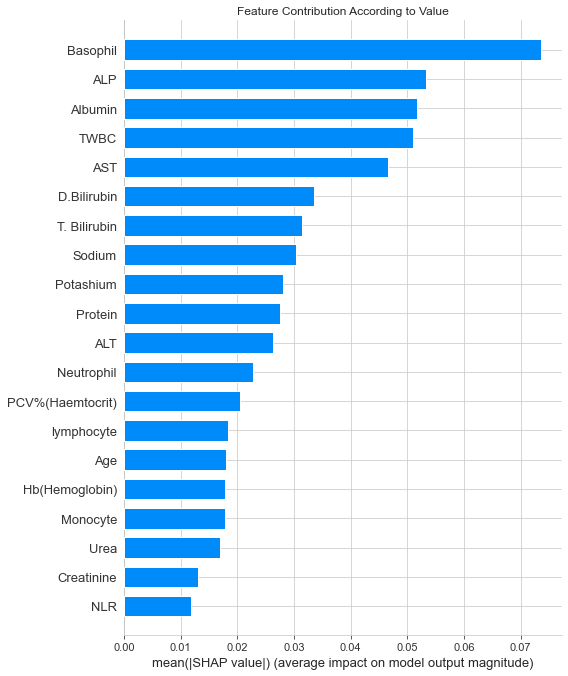

<Figure size 432x288 with 0 Axes>

In [48]:
# Average feature contribution
plt.title('Feature Contribution According to Value')

fig=shap.summary_plot(shap_values, x_train, plot_type="bar")

plt.savefig("BarChartSHAP.png", dpi=100,bbox_inches = 'tight')


In [49]:
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_pred=classifier_dtc.predict(x_test)

In [50]:
explainer = shap.TreeExplainer(classifier_dtc)
shap_values = explainer.shap_values(x_train)

# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[0], x_train)


In [51]:
shap.initjs() #initialize javascript in cell
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], x_train.iloc[0,:])

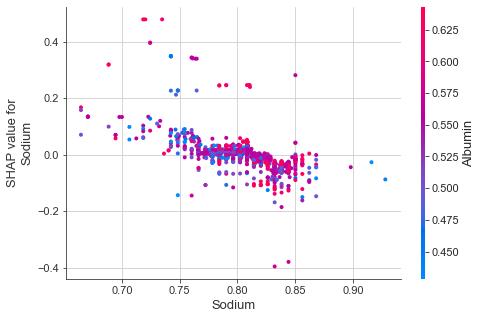

In [52]:
shap.dependence_plot("Sodium", shap_values[0], x_train)

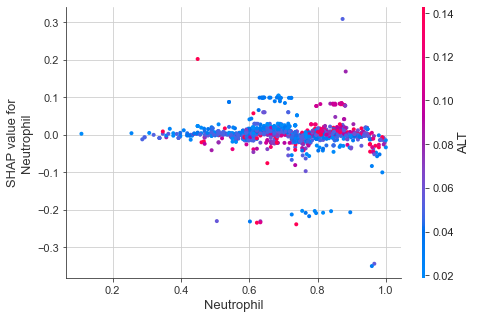

In [53]:
shap.dependence_plot("Neutrophil", shap_values[0], x_train)

In [54]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_train)

In [55]:
#Logistic Regression
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}

# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
lrClassifier = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

lrClassifier.fit(x_train, y_train)
lrClassifier.best_params_


Fitting 3 folds for each of 14 candidates, totalling 42 fits


{'C': 1000, 'penalty': 'l2'}

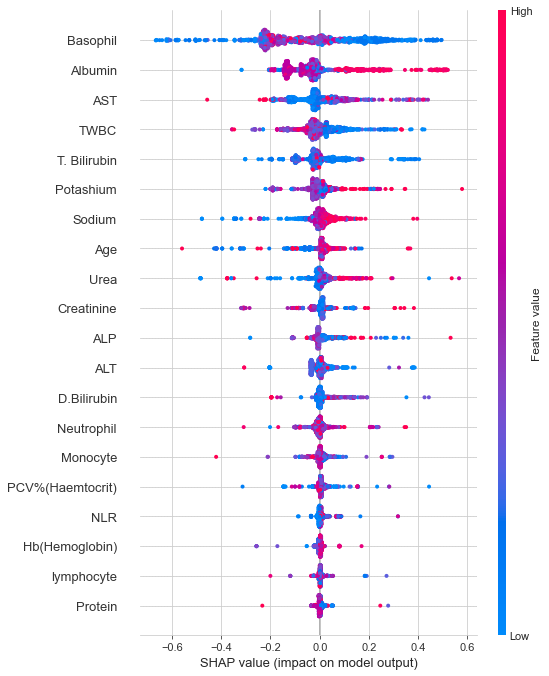

In [56]:
#A summary plot with the shapley value (feature importance) 
shap.summary_plot(shap_values[1], x_train)

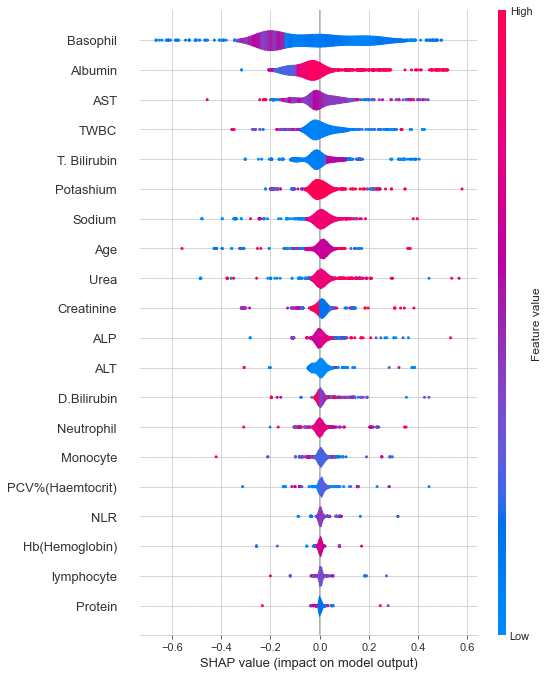

In [57]:
#Same as above, but with violin plots to better see the distribution of shapley values 
shap.summary_plot(shap_values[1], x_train, plot_type="violin")

[[ 61  15]
 [ 91 184]]
              precision    recall  f1-score   support

         0.0       0.40      0.80      0.54        76
         1.0       0.92      0.67      0.78       275

    accuracy                           0.70       351
   macro avg       0.66      0.74      0.66       351
weighted avg       0.81      0.70      0.72       351



accuracy 0.7
precision 0.92
recall 0.67
AUC: 0.8
Precision-Recall: 0.93


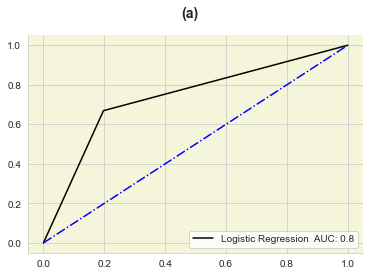

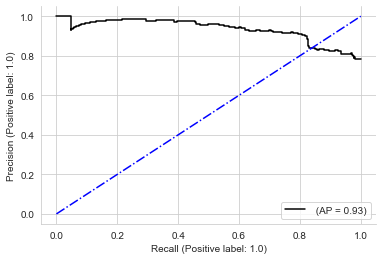

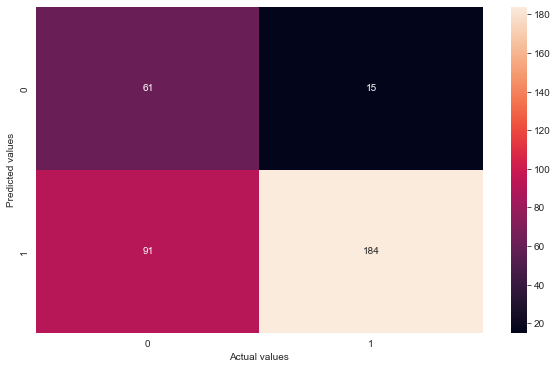

In [58]:
y_pred = lrClassifier.predict(x_test)
y_proba = lrClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# RandomForest summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Logistic Regression  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lrClassifier, x_test, y_test,color='xkcd:black', name = '')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matrix Logistic regression", dpi=800,bbox_inches = 'tight')
    

In [59]:
#ELI5
import eli5 as eli
eli.explain_weights(classifier_dtc)

Explanation(estimator='DecisionTreeClassifier()', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='x8', weight=0.22012868570408214, std=None, value=None), FeatureWeight(feature='x19', weight=0.15791354213101336, std=None, value=None), FeatureWeight(feature='x3', weight=0.08366875106454219, std=None, value=None), FeatureWeight(feature='x15', weight=0.07103296726158165, std=None, value=None), FeatureWeight(feature='x9', weight=0.05854704166117694, std=None, value=None), FeatureWeight(feature='x12', weight=0.05633224717328906, std=None, value=None), FeatureWeight(feature='x13', weight=0.05474000995256063, std=None, value=None), FeatureWeight(feature='x0', weight=0.04336914801637847, std=None, value=None), FeatureWeight(feature='x10', weight=0.041503116128972596, std=None, value=None), FeatureWeight(feature='x11', weight=0.040668999279187976, std=None, value=None), FeatureWeight(feature='x4', weight=0.03710164920450543, std=None, value=None), FeatureWeight(feature='x7', weight=0.026663984877164825, std=None, value=None), FeatureWeight(feature='x2', weight=0.021747896774261068, std=None, value=None), FeatureWeight(feature='x14', weight=0.021608854995770414, std=None, value=None), FeatureWeight(feature='x17', weight=0.02028796220628575, std=None, value=None), FeatureWeight(feature='x16', weight=0.015508550632130379, std=None, value=None), FeatureWeight(feature='x1', weight=0.010950854700854698, std=None, value=None), FeatureWeight(feature='x6', weight=0.007905982905982907, std=None, value=None), FeatureWeight(feature='x5', weight=0.005817412435059493, std=None, value=None), FeatureWeight(feature='x18', weight=0.004502342895200036, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[624.0, 624.0], value_ratio=[0.5, 0.5], impurity=0.5, samples=1248, sample_ratio=1.0, feature_name='x8', feature_id=8, threshold=0.05092903599143028, left=NodeInfo(id=1, is_leaf=False, value=[136.0, 337.0], value_ratio=[0.28752642706131076, 0.7124735729386892], impurity=0.409709961605335, samples=473, sample_ratio=0.37900641025641024, feature_name='x8', feature_id=8, threshold=0.04970426484942436, left=NodeInfo(id=2, is_leaf=False, value=[98.0, 127.0], value_ratio=[0.43555555555555553, 0.5644444444444444], impurity=0.4916938271604938, samples=225, sample_ratio=0.18028846153846154, feature_name='x8', feature_id=8, threshold=0.025034398771822453, left=NodeInfo(id=3, is_leaf=False, value=[61.0, 127.0], value_ratio=[0.324468085106383, 0.675531914893617], impurity=0.43837709370755995, samples=188, sample_ratio=0.15064102564102563, feature_name='x10', feature_id=10, threshold=0.07742709666490555, left=NodeInfo(id=4, is_leaf=False, value=[20.0, 100.0], value_ratio=[0.16666666666666666, 0.8333333333333334], impurity=0.2777777777777778, samples=120, sample_ratio=0.09615384615384616, feature_name='x9', feature_id=9, threshold=0.4032921940088272, left=NodeInfo(id=5, is_leaf=False, value=[13.0, 100.0], value_ratio=[0.11504424778761062, 0.8849557522123894], impurity=0.20361813767718695, samples=113, sample_ratio=0.09054487179487179, feature_name='x11', feature_id=11, threshold=0.735721617937088, left=NodeInfo(id=6, is_leaf=True, value=[3.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=3, sample_ratio=0.002403846153846154, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=7, is_leaf=False, value=[10.0, 100.0], value_ratio=[0.09090909090909091, 0.9090909090909091], impurity=0.1652892561983471, samples=110, sample_ratio=0.08814102564102565, feature_name='x0', feature_id=0, threshold=0.9199999868869781, left=NodeInfo(id=8, is_leaf=False, value=[8.0, 100.0], value_ratio=[0.07407407407407407, 0.9259259259259259], impurity=0.13717421124828533, samples=108, 

In [60]:
eli.explain_prediction(classifier_dtc , np.array(x_test)[1])

Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1.0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5, std=None, value=1.0), FeatureWeight(feature='x8', weight=0.3467741935483871, std=None, value=0.05), FeatureWeight(feature='x11', weight=0.055243445692883975, std=None, value=0.7964071856287425), FeatureWeight(feature='x0', weight=0.051636364819798386, std=None, value=0.83), FeatureWeight(feature='x9', weight=0.023809523809523725, std=None, value=0.23868312757201646), FeatureWeight(feature='x3', weight=0.006172839506172867, std=None, value=0.09661016949152543), FeatureWeight(feature='x7', weight=0.0055512016718913815, std=None, value=0.2318840579710145), FeatureWeight(feature='x15', weight=0.005491017583952207, std=None, value=0.06992230854605994), FeatureWeight(feature='x2', weight=0.0053214133673903374, std=None, value=0.6956521739130435)], neg=[], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [61]:
eli.show_prediction(classifier_dtc, x_test.iloc[1],
                    feature_names=list(x_train.columns),
                    show_feature_values=True)

In [62]:
#Decision Tree
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'min_samples_split' : range(10,500,20),
    'splitter' : ['best', 'random'],
    'min_samples_leaf': [1,5,8,11],
    'max_features': ['log2', 'sqrt','auto']
}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
dtClassifier = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

dtClassifier.fit(x_train, y_train)
dtClassifier.best_params_

Fitting 3 folds for each of 21600 candidates, totalling 64800 fits


{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

[[ 65  11]
 [ 45 230]]
              precision    recall  f1-score   support

         0.0       0.59      0.86      0.70        76
         1.0       0.95      0.84      0.89       275

    accuracy                           0.84       351
   macro avg       0.77      0.85      0.80       351
weighted avg       0.88      0.84      0.85       351



accuracy 0.84
precision 0.95
recall 0.84
AUC: 0.87
Precision-Recall: 0.94


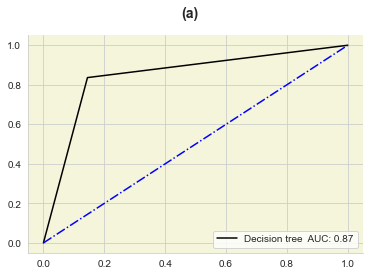

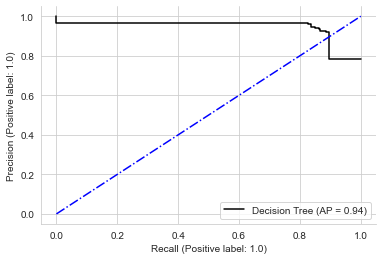

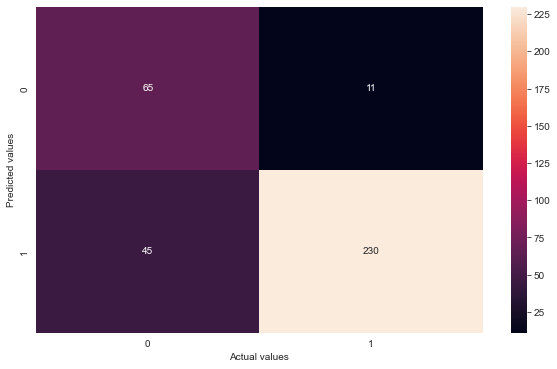

In [63]:
y_pred = dtClassifier.predict(x_test)
y_proba = dtClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Decision tree  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Decision Tree", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(dtClassifier, x_test, y_test,color='xkcd:black', name = 'Decision Tree')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Decision Tree", dpi=800,bbox_inches = 'tight')
    

In [64]:
# Create a based model
knn = KNeighborsClassifier(algorithm = 'brute')

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid search model
knnClassifier = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

knnClassifier.fit(x_train, y_train)
knnClassifier.best_params_


Fitting 3 folds for each of 99 candidates, totalling 297 fits


{'n_neighbors': 1}

[[ 65  11]
 [ 61 214]]
              precision    recall  f1-score   support

         0.0       0.52      0.86      0.64        76
         1.0       0.95      0.78      0.86       275

    accuracy                           0.79       351
   macro avg       0.73      0.82      0.75       351
weighted avg       0.86      0.79      0.81       351



accuracy 0.79
precision 0.95
recall 0.78
AUC: 0.82
Precision-Recall: 0.91


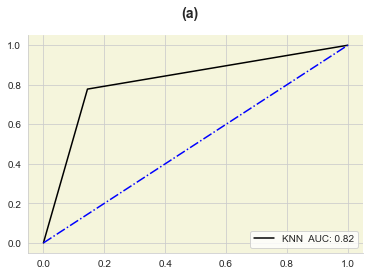

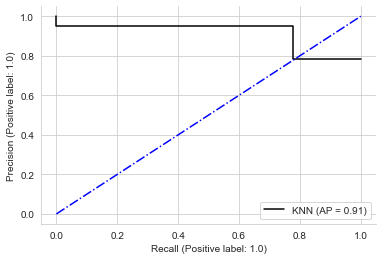

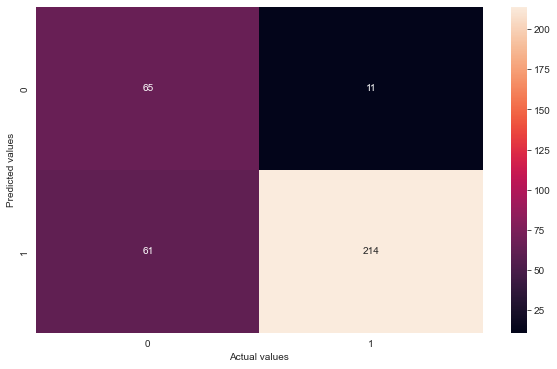

In [65]:
y_pred = knnClassifier.predict(x_test)
y_proba = knnClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='KNN  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC KNN", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(knnClassifier, x_test, y_test,color='xkcd:black', name = 'KNN')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR KNN", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix KNN", dpi=800,bbox_inches = 'tight')
    


In [66]:
# Create a based model
from sklearn import svm
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

[[ 60  16]
 [ 99 176]]
              precision    recall  f1-score   support

         0.0       0.38      0.79      0.51        76
         1.0       0.92      0.64      0.75       275

    accuracy                           0.67       351
   macro avg       0.65      0.71      0.63       351
weighted avg       0.80      0.67      0.70       351



accuracy 0.67
precision 0.92
recall 0.64
AUC: 0.78
Precision-Recall: 0.93


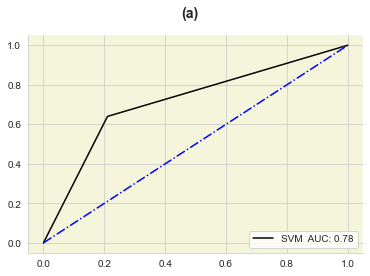

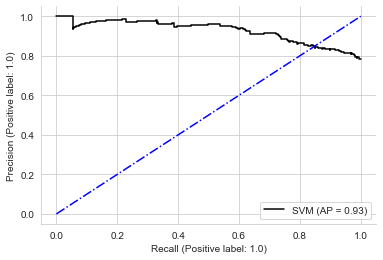

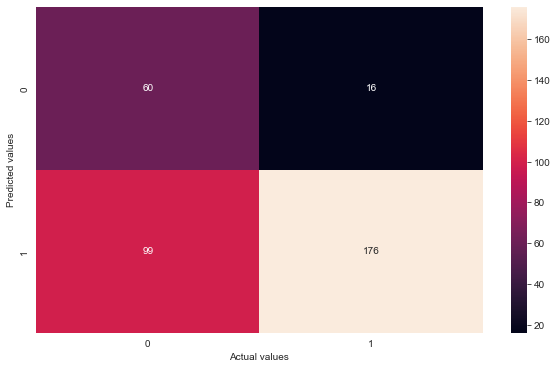

In [67]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='SVM  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC SVM", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, x_test, y_test,color='xkcd:black', name = 'SVM')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve SVM", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix SVM", dpi=800,bbox_inches = 'tight')
    

In [68]:
# Create a based model
from sklearn import svm
clf = svm.SVC(kernel='sigmoid',probability=True)
clf.fit(x_train, y_train)

SVC(kernel='sigmoid', probability=True)

[[ 74   2]
 [258  17]]
              precision    recall  f1-score   support

         0.0       0.22      0.97      0.36        76
         1.0       0.89      0.06      0.12       275

    accuracy                           0.26       351
   macro avg       0.56      0.52      0.24       351
weighted avg       0.75      0.26      0.17       351



accuracy 0.26
precision 0.89
recall 0.06
AUC: 0.45
Precision-Recall: 0.76


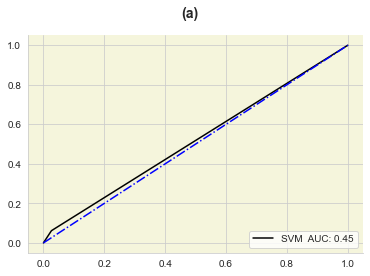

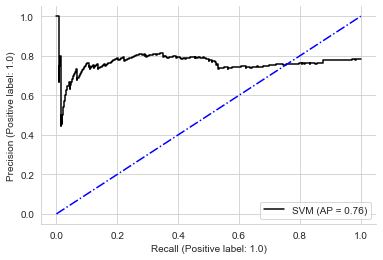

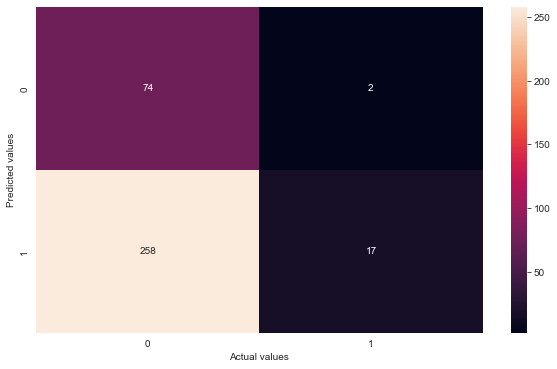

In [69]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='SVM  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC SVM", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, x_test, y_test,color='xkcd:black', name = 'SVM')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve SVM", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix SVM", dpi=800,bbox_inches = 'tight')
    

In [70]:
# Three models 
clf1 = lrClassifier
clf2 = dtClassifier
clf3 = knnClassifier 
clf6=rf

from mlxtend.classifier import StackingClassifier
# meta-classifier 
meta_clf = LogisticRegression(random_state=42)

# Stacking 
stack1 = StackingClassifier(classifiers=[clf1, clf2, clf3 , clf6],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 21600 candidates, totalling 64800 fits
Fitting 3 folds for each of 99 candidates, totalling 297 fits
[[ 65  11]
 [ 31 244]]
              precision    recall  f1-score   support

         0.0       0.68      0.86      0.76        76
         1.0       0.96      0.89      0.92       275

    accuracy                           0.88       351
   macro avg       0.82      0.87      0.84       351
weighted avg       0.90      0.88      0.89       351



accuracy 0.88
precision 0.96
recall 0.89
AUC: 0.94
Precision-Recall: 0.98


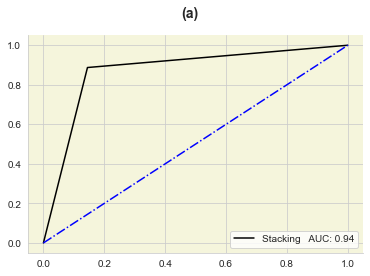

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


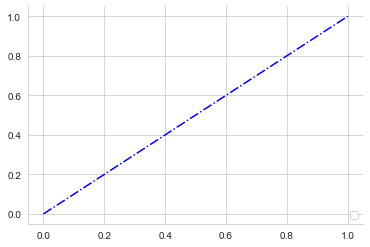

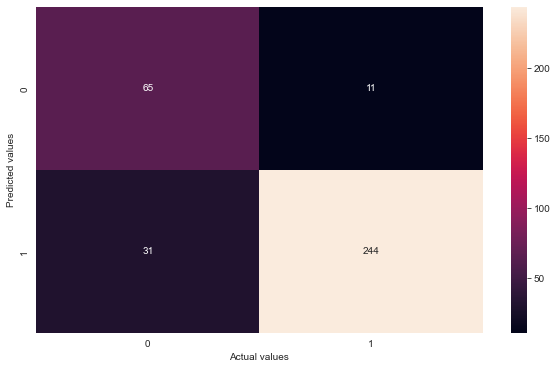

In [71]:
stack1.fit(x_train, y_train)
y_pred = stack1.predict(x_test)
y_proba = stack1.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Stacking   AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')
    
plt.show()
    

plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Stack1", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Stack1", dpi=800,bbox_inches = 'tight')
    

In [72]:
param_grid = {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

# Create a based model
ad = AdaBoostClassifier()
# Instantiate the grid search model
grid_searchAdaBoostClassifier = GridSearchCV(estimator = ad, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_searchAdaBoostClassifier.fit(x_train, y_train)
grid_searchAdaBoostClassifier.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'learning_rate': 1.0, 'n_estimators': 200}

[[ 68   8]
 [ 23 252]]
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81        76
         1.0       0.97      0.92      0.94       275

    accuracy                           0.91       351
   macro avg       0.86      0.91      0.88       351
weighted avg       0.92      0.91      0.91       351



accuracy 0.91
precision 0.97
recall 0.92
AUC: 0.95
Precision-Recall: 0.98


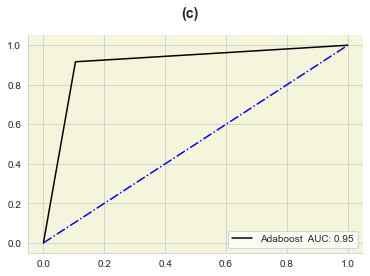

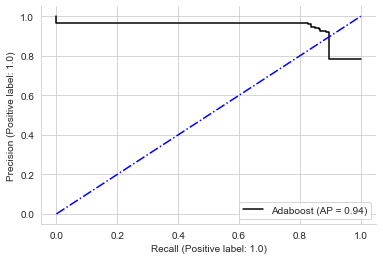

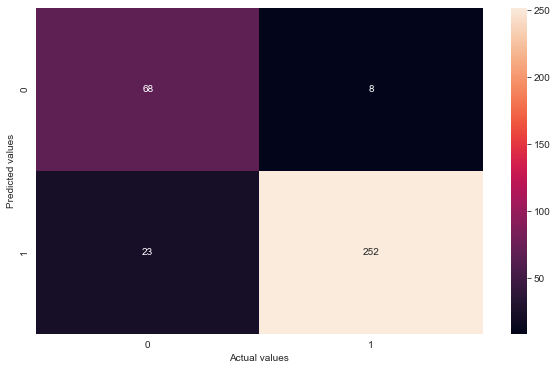

In [73]:
y_pred = grid_searchAdaBoostClassifier.predict(x_test)
y_proba = grid_searchAdaBoostClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(c)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Adaboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Adaboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(dtClassifier, x_test, y_test,color='xkcd:black', name = 'Adaboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Adaboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Adaboost", dpi=800,bbox_inches = 'tight')
    

In [74]:
from catboost import CatBoostClassifier

param_grid = {'depth':[3,1,2],
          'iterations':[250,100],
          'learning_rate':[0.03,0.001], 
          'l2_leaf_reg':[3,1,5,10],
          'border_count':[32,5,10],
        
             }

# Create a based model
cd = CatBoostClassifier()
# Instantiate the grid search model
grid_searchCatBoostClassifier = GridSearchCV(estimator = cd, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_searchCatBoostClassifier.fit(x_train, y_train)
grid_searchCatBoostClassifier.best_params_


Fitting 3 folds for each of 144 candidates, totalling 432 fits
0:	learn: 0.6837573	total: 144ms	remaining: 35.8s
1:	learn: 0.6757399	total: 146ms	remaining: 18.1s
2:	learn: 0.6690758	total: 148ms	remaining: 12.2s
3:	learn: 0.6577525	total: 149ms	remaining: 9.18s
4:	learn: 0.6491613	total: 151ms	remaining: 7.38s
5:	learn: 0.6433602	total: 152ms	remaining: 6.19s
6:	learn: 0.6345047	total: 154ms	remaining: 5.35s
7:	learn: 0.6273497	total: 156ms	remaining: 4.71s
8:	learn: 0.6191778	total: 158ms	remaining: 4.22s
9:	learn: 0.6129806	total: 160ms	remaining: 3.84s
10:	learn: 0.6059793	total: 162ms	remaining: 3.51s
11:	learn: 0.6003586	total: 163ms	remaining: 3.24s
12:	learn: 0.5931036	total: 165ms	remaining: 3s
13:	learn: 0.5879832	total: 166ms	remaining: 2.8s
14:	learn: 0.5825050	total: 169ms	remaining: 2.64s
15:	learn: 0.5771479	total: 171ms	remaining: 2.49s
16:	learn: 0.5717185	total: 172ms	remaining: 2.36s
17:	learn: 0.5655851	total: 175ms	remaining: 2.25s
18:	learn: 0.5612124	total: 176ms

206:	learn: 0.2352434	total: 468ms	remaining: 97.2ms
207:	learn: 0.2345011	total: 469ms	remaining: 94.8ms
208:	learn: 0.2337948	total: 471ms	remaining: 92.4ms
209:	learn: 0.2327662	total: 473ms	remaining: 90ms
210:	learn: 0.2318781	total: 474ms	remaining: 87.6ms
211:	learn: 0.2310883	total: 476ms	remaining: 85.2ms
212:	learn: 0.2304371	total: 477ms	remaining: 82.9ms
213:	learn: 0.2298151	total: 479ms	remaining: 80.6ms
214:	learn: 0.2294146	total: 481ms	remaining: 78.2ms
215:	learn: 0.2283136	total: 482ms	remaining: 75.9ms
216:	learn: 0.2276272	total: 484ms	remaining: 73.6ms
217:	learn: 0.2271881	total: 485ms	remaining: 71.3ms
218:	learn: 0.2264263	total: 487ms	remaining: 68.9ms
219:	learn: 0.2258349	total: 488ms	remaining: 66.6ms
220:	learn: 0.2252032	total: 490ms	remaining: 64.3ms
221:	learn: 0.2246996	total: 491ms	remaining: 62ms
222:	learn: 0.2241201	total: 493ms	remaining: 59.6ms
223:	learn: 0.2232827	total: 494ms	remaining: 57.4ms
224:	learn: 0.2226716	total: 496ms	remaining: 55.1

{'border_count': 32,
 'depth': 3,
 'iterations': 250,
 'l2_leaf_reg': 1,
 'learning_rate': 0.03}

[[ 66  10]
 [ 22 253]]
              precision    recall  f1-score   support

         0.0       0.75      0.87      0.80        76
         1.0       0.96      0.92      0.94       275

    accuracy                           0.91       351
   macro avg       0.86      0.89      0.87       351
weighted avg       0.92      0.91      0.91       351



accuracy 0.91
precision 0.96
recall 0.92
AUC: 0.96
Precision-Recall: 0.98


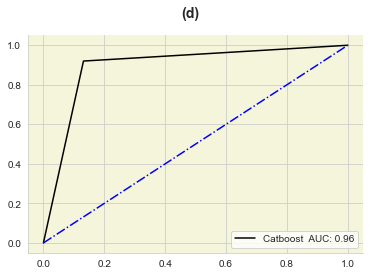

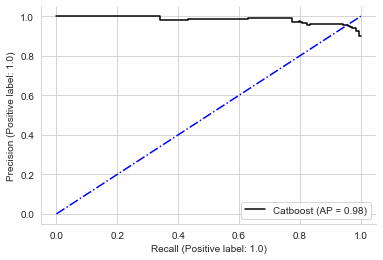

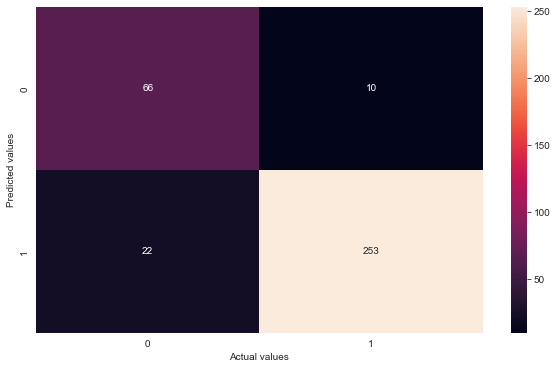

In [75]:
y_pred = grid_searchCatBoostClassifier.predict(x_test)
y_proba = grid_searchCatBoostClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Catboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Catboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(grid_searchCatBoostClassifier, x_test, y_test,color='xkcd:black', name = 'Catboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Catboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Catboost", dpi=800,bbox_inches = 'tight')
    

In [76]:
from lightgbm import LGBMClassifier

param_grid = {
     'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
             
        
             }

# Create a based model
lg =  LGBMClassifier()
# Instantiate the grid search model
lgm = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

lgm.fit(x_train, y_train)
lgm.best_params_


Fitting 3 folds for each of 120 candidates, totalling 360 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


{'lambda_l1': 0,
 'lambda_l2': 0,
 'min_data_in_leaf': 30,
 'num_leaves': 31,
 'reg_alpha': 0.1}

[[ 70   6]
 [  7 268]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92        76
         1.0       0.98      0.97      0.98       275

    accuracy                           0.96       351
   macro avg       0.94      0.95      0.95       351
weighted avg       0.96      0.96      0.96       351



accuracy 0.96
precision 0.98
recall 0.97
AUC: 0.98
Precision-Recall: 0.99


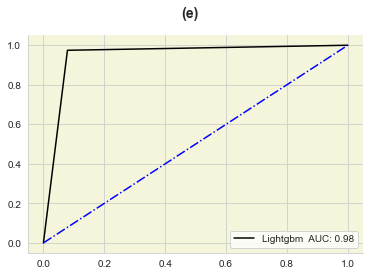

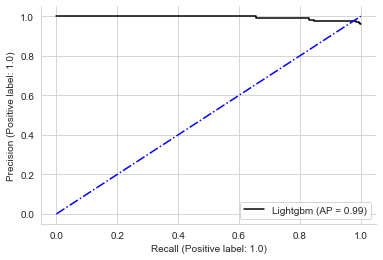

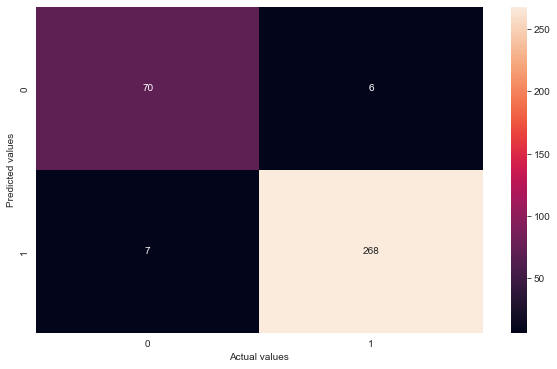

In [77]:
y_pred = lgm.predict(x_test)
y_proba = lgm.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(e)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Lightgbm  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Lightgbm", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lgm, x_test, y_test,color='xkcd:black', name = 'Lightgbm')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Lightgbm", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Lightgbm", dpi=800,bbox_inches = 'tight')
    

In [ ]:
from xgboost import XGBClassifier

param_grid = {
    "learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
             
        
             }

# Create a based model
lg = XGBClassifier()
# Instantiate the grid search model
xgb = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

xgb.fit(x_train, y_train)
xgb.best_params_



Fitting 3 folds for each of 360 candidates, totalling 1080 fits


In [ ]:
y_pred = xgb.predict(x_test)
y_proba = xgb.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(f)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Xgboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Xgboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(xgb, x_test, y_test,color='xkcd:black', name = 'Xgboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve xgboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Xgboost", dpi=800,bbox_inches = 'tight')
    

In [ ]:
#Stacking
# Three models 
from mlxtend.classifier import StackingClassifier
clf1 = grid_searchAdaBoostClassifier
clf2 = rfclassifier
clf3 = grid_searchCatBoostClassifier 
clf4 = lgm
clf5= xgb



# meta-classifier 
meta_clf = LogisticRegression(random_state=42,max_iter=9000)

# Stacking 
stack2 = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4,clf5],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)

In [ ]:
stack2.fit(x_train, y_train)
y_pred = stack2.predict(x_test)
y_proba = stack2.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))


fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(h)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='StackB  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC StackB", dpi=800,bbox_inches = 'tight')
    
plt.show()
    


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.suptitle('(b)', fontsize=10,fontweight='bold')
plt.savefig("Confusion matrix StackB", dpi=800,bbox_inches = 'tight')
        



In [ ]:
#Precsiion Recall Curve
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
fig, ax=plt.subplots()
ax.plot(recall,precision,color='black')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.savefig("PR StackB", dpi=800,bbox_inches = 'tight')
plt.show()

In [ ]:
#Final Stacking
#Stacking
# Three models 
from mlxtend.classifier import StackingClassifier
clf1 = stack1
clf2 = stack2


# meta-classifier 
meta_clf = LogisticRegression(random_state=42,max_iter=9000)

# Stacking 
stack3 = StackingClassifier(classifiers=[clf1, clf2],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)


In [ ]:
stack3.fit(x_train, y_train)


In [ ]:
y_pred = stack3.predict(x_test)
y_proba = stack3.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC mutual information", dpi=800,bbox_inches = 'tight')
    
plt.show()
    

#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.suptitle('(d)', fontsize=10,fontweight='bold')
plt.savefig("Confusion Matix Mutual Information,", dpi=800,bbox_inches = 'tight')
    


In [ ]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
fig, ax=plt.subplots()
ax.plot(recall,precision,color='blue')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.savefig("PR Mutual Information", dpi=800,bbox_inches = 'tight')
plt.show()

In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    mode='classification'
)

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[12], ##new data
    predict_fn=rfclassifier.predict_proba
)
exp.save_to_file('LIME1.html')

fig = exp.as_pyplot_figure()
fig.savefig('lime_report.png')

fig=exp.show_in_notebook(show_table=True)
plt.savefig("LIMESurvived.png", dpi=100,bbox_inches = 'tight')
plt.show()

In [ ]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.title("(c)")
    plt.savefig("LIME1.png", dpi=600,bbox_inches = 'tight')

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[25], ##new data
    predict_fn=rfclassifier.predict_proba
)

fig=exp.show_in_notebook(show_table=True)

In [ ]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.title("(d)")
    plt.savefig("LIME2.png", dpi=600,bbox_inches = 'tight')

In [ ]:
import feyn

In [ ]:
ql = feyn.connect_qlattice()

In [ ]:
ql.reset(random_seed=42)

In [ ]:
fig = ql.auto_run(df, output_name="Classlabel", kind="classification", max_complexity=5)

In [ ]:
fig[0].plot_roc_curve(df, label="Testing data")

In [40]:
fig[0].sympify(2)

NameError: name 'fig' is not defined